# Symbolic Algebra and Geometry

In [6]:
# %load_ext lab_black

# all imports should go here
import sys
import os
import subprocess
import datetime
import platform
import datetime
import matplotlib.pyplot as plt
import sympy as sym
import math
%matplotlib inline
sym.init_printing(use_unicode=True)

## Finding the Centroid of a Triangle
The centroid of a triangle is the point at which the lines drawn from every vertex of a triangle to the midpoint of the other side intersect.

If we draw one example, we can see that the lines intersect at a single point.

<ipython-input-7-ac81f2f8d72f>:45: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


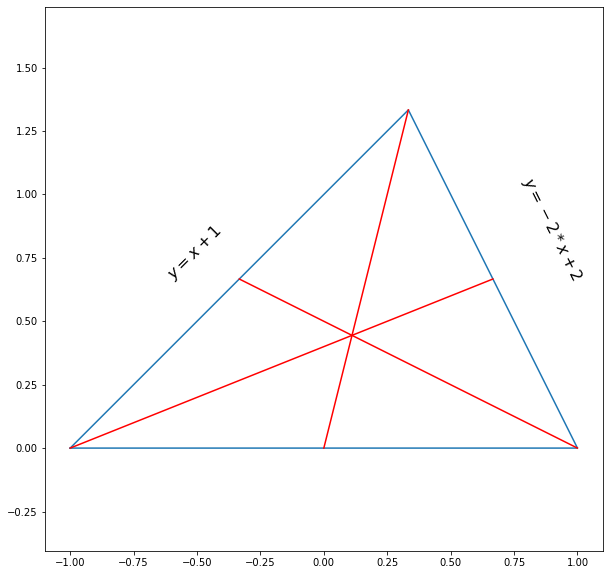

In [7]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)

# plot a triangle
x1, y1 = (-1, 0)
x2, y2 = (+1, 0)
x3, y3 = (1 / 3, 4 / 3)

ax.plot([x1, x2, x3, x1], [y1, y2, y3, y1])

# find mid point of sides
mid_x1 = (x2 + x3) / 2
mid_y1 = (y2 + y3) / 2

mid_x2 = (x1 + x3) / 2
mid_y2 = (y1 + y3) / 2

mid_x3 = (x1 + x2) / 2
mid_y3 = (y1 + y2) / 2

# plot the lines, vertex to opposite mid point
ax.plot([x1, mid_x1], [y1, mid_y1], color="r")
ax.plot([x2, mid_x2], [y2, mid_y2], color="r")
ax.plot([x3, mid_x3], [y3, mid_y3], color="r")

# label the lines
ax.text(
    mid_x1 + 0.1,
    mid_y1,
    "$y = -2*x+2$",
    fontsize=16,
    rotation=-63.435,
)
ax.text(
    mid_x2 - 0.3,
    mid_y2,
    "$y = x+1$",
    fontsize=16,
    rotation=45,
)

ax.set_aspect("equal", "datalim")


fig.show()

## Define symbolic variables
Assume we have a triangle, with base x = -1 to +1, y=0, and sides of slope m1 and m2. We lose no generality by these assumptions.

We first define all the variable that will hold symbolic values (no all are used in the fragments shown).

In [8]:
y1, y2, x, m1, m2, xa, ya, xb, yb, xc, yc, x0, y0 = sym.symbols(
    'y1 y2 x m1 m2 xa, ya xb yb xc yc x0 y0'
)

In [9]:
side1 = m1 * (x - 1)
side2 = m2 * (x + 1)

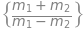

In [10]:
sym.solveset(side1 - side2, x)

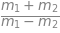

In [11]:
x_apex = list(sym.solveset(side1 - side2, x))[0]
x_apex

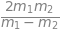

In [12]:
y_apex = side1.subs(x, x_apex)
y_apex = sym.simplify(y_apex)

y_apex

<ipython-input-13-2473c5add9b6>:68: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


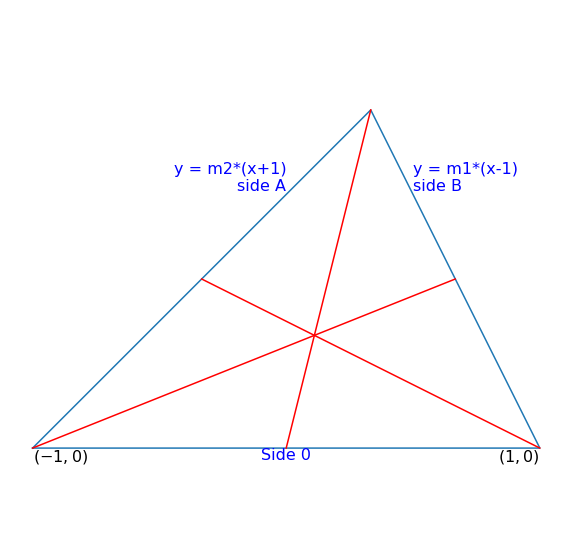

In [13]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)

# plot a triangle
x1, y1 = (-1, 0)
x2, y2 = (+1, 0)
x3, y3 = (1 / 3, 4 / 3)

ax.plot([x1, x2, x3, x1], [y1, y2, y3, y1])

# find mid point of sides
mid_x1 = (x2 + x3) / 2
mid_y1 = (y2 + y3) / 2

mid_x2 = (x1 + x3) / 2
mid_y2 = (y1 + y3) / 2

mid_x3 = (x1 + x2) / 2
mid_y3 = (y1 + y2) / 2

# plot the lines, vertex to opposite mid point
ax.plot([x1, mid_x1], [y1, mid_y1], color="r")
ax.plot([x2, mid_x2], [y2, mid_y2], color="r")
ax.plot([x3, mid_x3], [y3, mid_y3], color="r")

# label the lines
ax.text(
    (mid_x1 + x3) / 2,
    (mid_y1 + y3) / 2,
    "y = m1*(x-1)\nside B",
    fontsize=16,
    va="bottom",
    ha="left",
    color="b",
)
ax.text(
    (mid_x2 + x3) / 2,
    (mid_y2 + y3) / 2,
    "y = m2*(x+1)\nside A",
    fontsize=16,
    ha="right",
    va="bottom",
    color="b",
)
ax.text(
    -1, 0, "$(-1, 0)$", fontsize=16, va="top", ha="left"
)
ax.text(1, 0, "$(1, 0)$", fontsize=16, va="top", ha="right")
ax.text(
    0,
    0,
    "Side 0",
    fontsize=16,
    va="top",
    ha="center",
    color="blue",
)

ax.set_aspect("equal", "datalim")

# Hide the right and top spines
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.axis("off")

fig.show()

Define the midpoints of Side B, symbolically.

In [14]:
y_B = y_apex / 2
x_B = sym.simplify((x_apex + 1) / 2)
x_B

In [15]:
y_B

Do the same for Side A

In [16]:
y_A = y_apex / 2
x_A = sym.simplify((-1 + x_apex) / 2)

In [17]:
# show x_A
x_A

In [18]:
# show y_A
y_A

## Define the lines from vertexes to midpoints symbolically
Because the midpoint of the base is at (0,0) by definition, the form of the equation for the line from the top vertex is simplified (no intercept value)

In [19]:
# x1, y1 =-1,0   x2, y2 = x_B, y_B

line0B = (x + 1) * (y_B - 0) / (x_B + 1) + 0

# x1, y1 = 1,0  x2, y2 = x_A, y_A

line1A = (x - 1) * (y_A - 0) / (x_A - 1) + 0

line2 = x * y_apex / x_apex

We display the equations for these lines

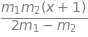

In [20]:
sym.simplify(line0B)

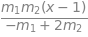

In [21]:
sym.simplify(line1A)

Now, lets solve for where every pair these lines intersect.

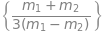

In [22]:
sym.solveset(line0B - line1A, x)

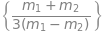

In [23]:
sym.solveset(line2 - line0B, x)

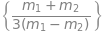

In [24]:
sym.solveset(line2 - line1A, x)

So, all of these side-bisector line intersect at the same X value! We now substitute into the equation for each line, to get the Y values.

In [25]:
x_cent = list(sym.solveset(line2 - line0B, x))[0]

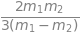

In [26]:
line2.subs(x, x_cent)

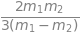

In [27]:
sym.simplify(line1A.subs(x, x_cent))

## Conclusion
So every pairwise intersection of vertex-to-midpoint-of-opposite-side lines has the the same (X,Y) value symbolically. Moreover, it's easy to see that the intersection point has a Y value one third that of the top vertex Y value, so the intersection divides the vertex-to-midpoint-of-opposite-side lines into two third / one third sections.

I must admit that I don't have a good geometric intuition for this latter fact.

## Intersection of Perpendicular Bisectors
If you draw a line perpendicular to each side of a triangle, through the midpoint of that side, then each of the three perpendiculars will meet at a common point, and this point is the center of a circle that passes through the vextexes of the triangle.

The geometric intuition for this is more obvious: every point on a perpendicular, is equidistant from the ends of the side it is drawn from. What is not so obvious (at least to me) is how to prove three points define a unique circle. For example, two points and a line define two circles (in general).

<ipython-input-30-c8c475bebe95>:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


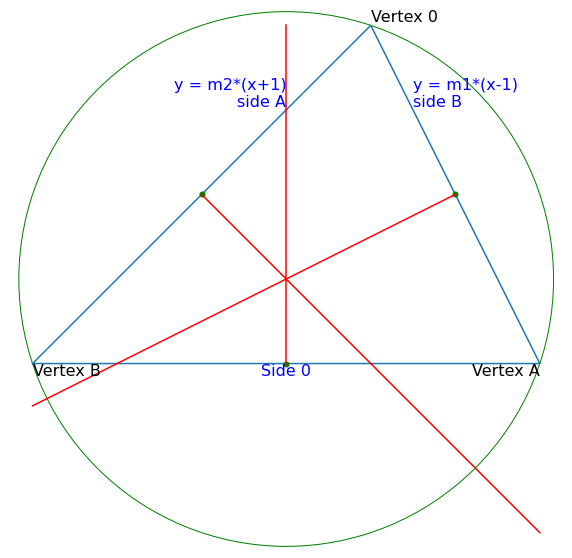

In [30]:
def draw_perps(ax):

    # plot a triangle
    x1, y1 = (-1, 0)
    x2, y2 = (+1, 0)
    x3, y3 = (1 / 3, 4 / 3)
    ax.plot([x1, x2, x3, x1], [y1, y2, y3, y1])

    # find mid point of sides
    mid_x1 = (x2 + x3) / 2
    mid_y1 = (y2 + y3) / 2

    mid_x2 = (x1 + x3) / 2
    mid_y2 = (y1 + y3) / 2

    mid_x3 = (x1 + x2) / 2
    mid_y3 = (y1 + y2) / 2

    # plot mid points of sides
    ax.plot(
        mid_x1, mid_y1, marker='o', color='g', markersize=5
    )
    ax.plot(
        mid_x2, mid_y2, marker='o', color='g', markersize=5
    )
    ax.plot(
        mid_x3, mid_y3, marker='o', color='g', markersize=5
    )

    # slopes of our lines
    mm1 = -2
    mm2 = 1

    # show perpendicular bisectors of triangle sides
    x = 1
    x_A = mid_x2
    y_A = mid_y2
    perpA = -(1 / mm2) * (x - x_A) + y_A
    ax.plot([x_A, 1], [y_A, perpA], color='r')

    x_B = mid_x1
    y_B = mid_y1
    x = -1
    perpB = -(1 / mm1) * (x - x_B) + y_B
    ax.plot([x_B, -1], [y_B, perpB], color='r')

    ax.plot([0, 0], [0, y3], color='r')

    # label the sides
    ax.text(
        (mid_x1 + x3) / 2,
        (mid_y1 + y3) / 2,
        'y = m1*(x-1)\nside B',
        fontsize=16,
        va='bottom',
        ha='left',
        color='b',
    )
    ax.text(
        (mid_x2 + x3) / 2,
        (mid_y2 + y3) / 2,
        'y = m2*(x+1)\nside A',
        fontsize=16,
        ha='right',
        va='bottom',
        color='b',
    )
    # label the vertexes
    ax.text(
        -1, 0, 'Vertex B', fontsize=16, va='top', ha='left'
    )
    ax.text(
        1, 0, 'Vertex A', fontsize=16, va='top', ha='right'
    )
    ax.text(
        x3,
        y3,
        'Vertex 0',
        fontsize=16,
        va='bottom',
        ha='left',
    )

    # label the base
    ax.text(
        0,
        0,
        'Side 0',
        fontsize=16,
        va='top',
        ha='center',
        color='blue',
    )
    # show the circle through vertexes, centered on perp. bisectors intersection
    circle1 = plt.Circle(
        (0, 1 / 3),
        math.sqrt((1) ** 2 + (1 / 3) ** 2),
        ec='g',
        fc='none',
    )
    plt.gcf().gca().add_artist(circle1)


# end draw_perps

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
draw_perps(ax)

ax.set_aspect('equal', 'datalim')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.axis('off')

fig.show()

## Equations for Perpendiculars
We get the symbolic equations for the (non-vertical) perpendiculars. The bisector of the base is just the equation x = 0. We use the fact that the lines y=m*x and y=(-1/m)*x are orthogonal.

In [33]:
perpA = -(1 / m2) * (x - x_A) + y_A
perpB = -(1 / m1) * (x - x_B) + y_B
# show perp. A symbolically
perpA

In [34]:
# show prep B
perpB

In [35]:
sym.solveset(perpA - perpB, x)

In [36]:
x_p = 0
y_p = perpA.subs(x, 0)
y_p

In [37]:
r0_2 = (x_p - x_apex) ** 2 + (y_p - y_apex) ** 2

rA_2 = (x_p - 1) ** 2 + (y_p) ** 2

rB_2 = (x_p + 1) ** 2 + (y_p) ** 2

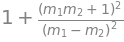

In [38]:
# show the the radius squared
sym.simplify(rB_2)

In [39]:
# check difference in R squared value from center to vertex 0 and A
sym.simplify(r0_2 - rA_2)

In [40]:
# check difference in R squared value from center to vertex 0 and B
sym.simplify(r0_2 - rB_2)

## Trisecting a line with ruler only, given a parallel line
As an example of a more challenging problem, the task was to trisect a line, using only a ruler, given another parallel line.

I eventually arrived at the following steps, after failing around drawing every possible line I could for a long while.

Assume we have a line segment (-1,0) to (1,0), with a parallel line to this a units below (y=-a)

Pick a point x0, y0 the other side of the segment from the parallel line

form a line line1 through x0,y0 and 1,0
form a line line2 through x0,y0 and -1,0.
line1 intersects the parallel line at xa1, ya1
line2 intersects the parallel line at xa2, ya2
form the line3 through (1,0) and xa2, ya2
form the line4 through -1,0 and xa1, ya1
line3 and line4 intersect at point x5, y5

form the line line5 through x0,y0 and x5, y5
line5 intersects the segment at 0,0

form the line line6 through xa2, ya2 and 0,0
form the line line7 through xa1, ya1 and 0,0
line3 and line7 intersect at x7, y7

line4 and line6 intersect at x6, y6

form the line line8 through x0, y0 and x6, y6
form the line line9 through x0, y0 and x7, y7
line8 and line9 trisect the segment

In [42]:
x, y, x0, y0, a = sym.symbols('x y x0 y0 a')

x1 = 1
y1 = 0

x2 = -1
y2 = 0

line1 = (y0 - y1) / (x0 - x1) * (x - x1) + y1
line2 = (y0 - y2) / (x0 - x2) * (x - x2) + y2

xa1 = list(sym.solveset(line1 + a, x))[0]
xa2 = list(sym.solveset(line2 + a, x))[0]

ya1 = -a
ya2 = -a

line3 = (ya2 - y1) / (xa2 - x1) * (x - x1) + y1
line4 = (ya1 - y2) / (xa1 - x2) * (x - x2) + y2

# point 5 is where line3 and line4 intersect

x5 = list(sym.solveset(line3 - line4, x))[0]
y5 = line3.subs(x, x5)

line5 = (y0 - y5) / (x0 - x5) * (x - x5) + y5

line6 = ya2 / xa2 * x
line7 = ya1 / xa1 * x

# point 6 is where line6 and line4 intersect
# point 7 is where line7 and line3 intersect
x6 = list(sym.solveset(line6 - line4, x))[0]
x7 = list(sym.solveset(line7 - line3, x))[0]

y6 = line6.subs(x, x6)
y7 = line7.subs(x, x7)

line8 = (y0 - y6) / (x0 - x6) * (x - x6) + y6
line9 = (y0 - y7) / (x0 - x7) * (x - x7) + y7

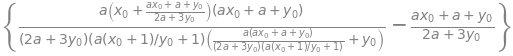

In [43]:
# get the x value where line8 cuts the x axis
sym.simplify(sym.solveset(line8, x))

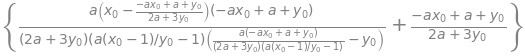

In [44]:
# get the x value where line9 cuts the x axis
sym.simplify(sym.solveset(line9, x))

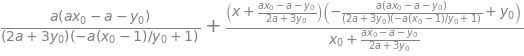

In [45]:
line9